Frequency: 0.25
Frequency: 0.251
Frequency: 0.252
Frequency: 0.253
Frequency: 0.254
Frequency: 0.255
Frequency: 0.256
Frequency: 0.257
Frequency: 0.258
Frequency: 0.259
Frequency: 0.26
Frequency: 0.261
Frequency: 0.262
Frequency: 0.263
Frequency: 0.264
Frequency: 0.265
Frequency: 0.266
Frequency: 0.267
Frequency: 0.268
Frequency: 0.269
Frequency: 0.27
Frequency: 0.271
Frequency: 0.272
Frequency: 0.273
Frequency: 0.274
Frequency: 0.275
Frequency: 0.276
Frequency: 0.277
Frequency: 0.278
Frequency: 0.279
Frequency: 0.28
Frequency: 0.281
Frequency: 0.282
Frequency: 0.283
Frequency: 0.284
Frequency: 0.285
Frequency: 0.286
Frequency: 0.287
Frequency: 0.288
Frequency: 0.289
Frequency: 0.29
Frequency: 0.291
Frequency: 0.292
Frequency: 0.293
Frequency: 0.294
Frequency: 0.295
Frequency: 0.296
Frequency: 0.297
Frequency: 0.298
Frequency: 0.299
Frequency: 0.3
Frequency: 0.301
Frequency: 0.302
Frequency: 0.303
Frequency: 0.304
Frequency: 0.305
Frequency: 0.306
Frequency: 0.307
Frequency: 0.308
Freq

Text(0, 0.5, 'transmission')

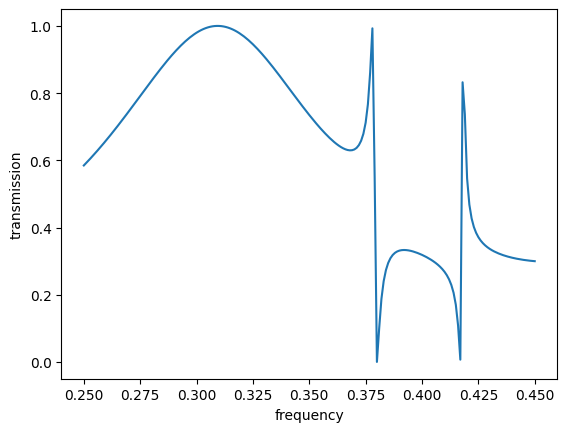

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

"""
A photonic-crystal slab in vacuum. Permittivity 12.
Square lattice with period 1 in both x and y.
thickness 0.5
A circular hole of radius 0.2 in each unit cell.

 → y
↓x      ⋮
     ◯ ◯ ◯
...  ◯ ◯ ◯ ...  (top view)
     ◯ ◯ ◯
        ⋮
"""

import numpy as np
from inkstone import Inkstone

s = Inkstone()
s.lattice = ((1, 0), (0, 1))
s.num_g = 50

s.AddMaterial(name='di', epsilon=12)

s.AddLayer(name='in', thickness=0, material_background='vacuum')
s.AddLayer(name='slab', thickness=0.5, material_background='di')
s.AddLayerCopy(name='out', original_layer='in', thickness=0)

s.AddPatternDisk(layer='slab', pattern_name='disk', material='vacuum', radius=0.2)

# Incident wave
s.SetExcitation(theta=0, phi=0, s_amplitude=1, p_amplitude=0)

flux_in = []
flux_out = []
freq = np.linspace(0.25, 0.45, 201)
for i in freq:
    print('Frequency: {:g}'.format(i))

    s.SetFrequency(i)

    flux_in.append(s.GetPowerFlux('in'))
    flux_out.append(s.GetPowerFlux('out'))

incident = np.array([a[0] for a in flux_in])
reflection = -np.array([a[1] for a in flux_in]) / incident
transmission = np.array([a[0] for a in flux_out]) / incident

#%% plotting
from matplotlib import pyplot as plt
plt.plot(freq, transmission)
plt.xlabel('frequency')
plt.ylabel('transmission')